<a href="https://colab.research.google.com/github/Nenad523/mastering-git/blob/main/Computer_Vision1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Computer vision

There are different variations of Computer Vision:
* Classification
* Object detention ( predicting where on an image is an object )
* Segmentation (dividing photo in segments, usually foe enhancing )
* Self-driving cars
* More


- For this purpose, most common are CNNs (Convolutional Neural Networks)

## 0. Computer vision libraries in PyTorch

* [`torchvision`](https://docs.pytorch.org/vision/stable/index.html) - base domain library for PyTorch computer vision
* `torchvision.datasets` - get dasets and data laoding functions for CV
* `torchvision.models` - get pretrained CV models
* `torchvision.transforms` - functions for manipulating vision data (images) to be suitable for use with an ML model

In [5]:
# Import PyTorch
import torch
from torch import nn

# Import torchvision
import torchvision
from torchvision import datasets, transforms
from torchvision.transforms import ToTensor

# Import matplotlib for visualiation
import matplotlib.pyplot as plt

# Check version
print(torch.__version__)
print(torchvision.__version__)

2.8.0+cu126
0.23.0+cu126


# 1. Getting a dataset

The dataset we'll be using is FashionMNIST from torchvison.datasets

In [6]:
# Setup training data

train_data = datasets.FashionMNIST(
    root = "data", # where to download data to
    train = True, # do we want the training dataset?
    download = True, # do we want to download it
    transform = ToTensor(), # how do we want to tranform the data?
    target_transform = None # how do we want to transofrm the labels/targets?
)

test_data = datasets.FashionMNIST(
    root = "data",
    train = False,
    download = True,
    transform = ToTensor(),
    target_transform = None
)


100%|██████████| 26.4M/26.4M [00:02<00:00, 11.7MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 209kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 3.91MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 7.59MB/s]


In [7]:
len(train_data), len(test_data)

(60000, 10000)

In [8]:
# See the first training example
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [9]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [10]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [11]:
# Check the shape of our image
print(f"Image shape: {image.shape} -> [color_channels, height, width]")
print(f"Image label: {class_names[label]}")

Image shape: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Image label: Ankle boot


### 1.2 Visualizing our data

Image shape: torch.Size([1, 28, 28])


Text(0.5, 1.0, 'Ankle boot')

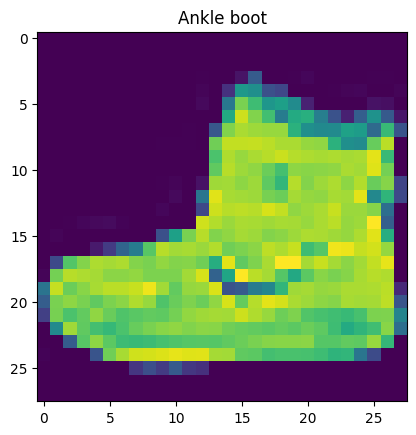

In [12]:
import matplotlib.pyplot as plt
image, label = train_data[0]
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze())
plt.title(class_names[label])

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

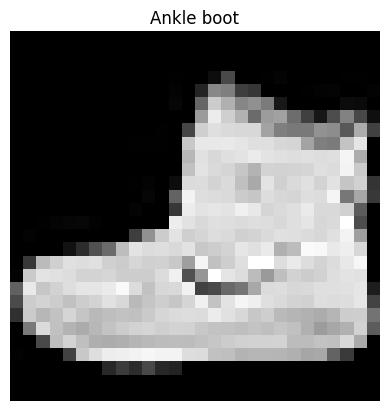

In [13]:
plt.imshow(image.squeeze(), cmap = "gray")
plt.title(class_names[label])
plt.axis(False)

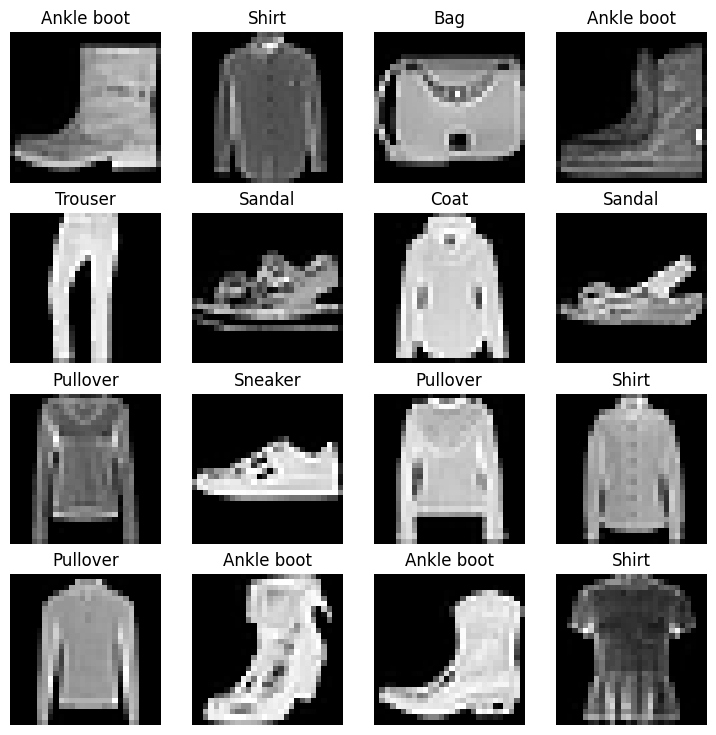

In [14]:
from re import L
# Plot more images
torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows, cols = 4, 4

for i in range(1, rows * cols + 1):
  random_indx = torch.randint(0, len(train_data), size=[1]).item()
  img, label = train_data[random_indx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img.squeeze(), cmap="gray")
  plt.title (class_names[label])
  plt.axis(False)

Do you think these items of clothing (images) could be modelled with pure linear lines? Or do you think we'll need non-linearities?

In [15]:
train_data, test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

# 2. Prepare DataLoader

Right now, our data is in the form of PyTorch DataSets.

DataLoader turns our dataset into a Pytthon iterable.

More specifially, we want to turn our data into batches (mini batches).

Why would we do this?

1. It is more computationly efficent, as in, your computing hardware may not be able to look (store in memory) at 60000 images in one hit. So we break it down to 32 images at a time (batch size of, e.g. 32).
2. It gives our NN more chances to update its gradients per epoch.

In [16]:
from torch.utils.data import DataLoader

# Setup the batch size hyperparameter
BATCH_SIZE = 32

train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7a874d22e4e0>,
 <torch.utils.data.dataloader.DataLoader at 0x7a874d4ee270>)

In [17]:
# Let's check out what we've created
print(f"Dataloader: {train_dataloader, test_dataloader}")
print(f"Length of train_dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}...")
print(f"Length of test_dataloader: {len(test_dataloader)} braches of {BATCH_SIZE}...")

Dataloader: (<torch.utils.data.dataloader.DataLoader object at 0x7a874d22e4e0>, <torch.utils.data.dataloader.DataLoader object at 0x7a874d4ee270>)
Length of train_dataloader: 1875 batches of 32...
Length of test_dataloader: 313 braches of 32...


In [18]:
# Check out what's inside the trianign dataloder
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label: 6, label size: torch.Size([])


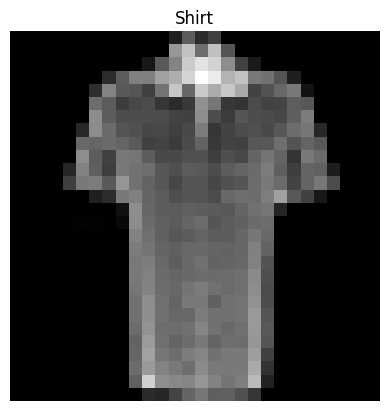

In [19]:
# Show a sample
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch),   size = [1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]

plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)

print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

## 3. Model 0: Build a baseline model

When starting to build a series of machine learning modeling expermients, it's best practice to start with a baseline model.

A baseline model is a simple model you will try and improve upon with subsequent models/experiments.

In other words: start simply and add complexity when neccesary.

In [20]:
# Create a flatten layer
flatten_model = nn.Flatten()

# Get a single sample
x = train_features_batch[0]
x.shape

# Flatten the sample
output = flatten_model(x) # perform forward pass

# Print out what happened
print(f"Shape before flattening: {x.shape} -> [color_chanells, width, height]")
print(f"Shape after flattening: {output.shape} -> [color_chanels, width*height]")

Shape before flattening: torch.Size([1, 28, 28]) -> [color_chanells, width, height]
Shape after flattening: torch.Size([1, 784]) -> [color_chanels, width*height]


In [21]:
output.squeeze()

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0039, 0.0039, 0.0000, 0.0000, 0.0078, 0.0078,
        0.0000, 0.0000, 0.0039, 0.0078, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.2863, 0.0000, 0.0000, 0.0078, 

In [22]:
from torch import nn

class FashionMNISTModelV0(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):

    super().__init__()

    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,
                  out_features=hidden_units),
        nn.Linear(in_features=hidden_units,
                  out_features=output_shape)
    )

  def forward(self, x):
    return self.layer_stack(x)

In [23]:
torch.manual_seed(42)

# Setup model with input parameters
model_0 = FashionMNISTModelV0(
    input_shape=784, # 28*28
    hidden_units=10,
    output_shape=len(class_names) # one for every class (10 in our case)
).to("cpu")

model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [24]:
dummy_x = torch.rand([1, 1, 28, 28])
model_0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

In [25]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('layer_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.

### 3.1 Setup loss, optimizer and evaluation metrics

* Loss function - since we're working with multi-class data, our loss functui will be `nn.CrossEntropyLoss()`.
* Optimizer - our optimizer `torch.optim.SGD()`
* Ecaluation metric - Accuracy

In [26]:
import requests
from pathlib import Path

# Download helper functions from Learn Pytorch repo

if Path("helper_functions.py").is_file():
  print("Already exists.")
else:
  print("Donwloading helper_functions.py...")

  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py")

  with open("helper_functions.py", "wb") as f:
    f.write(request.content)



Donwloading helper_functions.py...


In [27]:
# Import accuracy metric
from helper_functions import accuracy_fn

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_0.parameters(),
                            lr = 0.1)

 ### 3.2 Creating a function to time our experiments

 ML is very experimental.

 Two of the main things you'l want often to track are:
 1. Model's performance (loss and accuracy values etc)
 2. How fast it runs


In [28]:
from timeit import default_timer as timer
# To see how fast it runs

def print_train_time(start: float,
                     end: float,
                     device: torch.device = None):

  """
  Prints difference between start and end time.
  """

  total_time = end - start
  print(f"Train time on {device}: {total_time: .3f} seconds.")

In [29]:
start_time = timer()
# some code...
end_time = timer()
print_train_time(start = start_time, end = end_time, device="cpu")

Train time on cpu:  0.000 seconds.


## 3.3 Creaing a training loop and  ttraining a model on batches of data

1. Loop through epochs.
2. Loop through training batches, perfrom trianing steps, calculate the train loss *per batch*
3. Loop trhough testing batches, perfrom testing steps.
4. Print out what is happening
5. Time it all

In [30]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# Set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# Set the number of epochs (we'll keep this small for faster training time)
epochs = 3

# Create training and test loop

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n-------")

  # Training
  train_loss = 0

  # Add a loop to loop through the training batches
  for batch, (X, y) in enumerate(train_dataloader):
    model_0.train()

    # 1.Forward pass
    y_pred = model_0(X)

    # 2. Calculate loss (per batch)
    loss = loss_fn(y_pred, y)
    train_loss += loss # accumulate train loss

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    # Print out what is happening
    if batch % 400 == 0:
      print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples.")

  # Divide total train  loss by length of train dataloader
  train_loss /= len(train_dataloader)

  # Testing
  test_loss, test_acc = 0, 0
  model_0.eval()

  with torch.inference_mode():
    for X_test, y_test in test_dataloader:
      # 1. Forward pass
      test_pred = model_0(X_test)

      # 2. Calculate the loss (accumulatively)
      test_loss += loss_fn(test_pred, y_test)

      # 3. Calculate the accuracy
      test_acc += accuracy_fn(y_test, test_pred.argmax(dim=1))

    # Calculate the test loss average per batch
    test_loss /= len(test_dataloader)

    # Calculate the test acc average per batch
    test_acc /= len(test_dataloader)

  # Print out what is happening
  print(f"\nTrain loss: {train_loss: .4f} | Test loss: {test_loss: .4f}, Test acc: {test_acc: .4f}%")

# Calculate training time
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu,
                                            end=train_time_end_on_cpu,
                                            device=str(next(model_0.parameters()).device))


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss:  0.5904 | Test loss:  0.5095, Test acc:  82.0387%
Epoch: 1
-------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss:  0.4763 | Test loss:  0.4799, Test acc:  83.1969%
Epoch: 2
-------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss:  0.4550 | Test loss:  0.4766, Test acc:  83.4265%
Train time on cpu:  37.956 seconds.


## 4. Make predictions and get Model 0 results

In [31]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [32]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device: torch.device = device):
  """
  Returns a dictionary contianing the results of model predicition on data_loader.
  """

  loss, acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X, y in data_loader:
      X = X.to(device)
      y = y.to(device)

      # Make predictins
      y_pred = model(X)

      # Accumulate the loss and acc values per batch
      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))

    # Scale loss and acc to find the acerage loss/acc per batch
    loss /= len(data_loader)
    acc /= len(data_loader)

  return {"model_name": model.__class__.__name__,
          "model_loss": loss.item(),
          "model_acc": acc}


In [33]:

# Calcuate model 0 results on test dataset
model_0.to(device)
model_0_results = eval_model(model=model_0,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn)

model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

## 5. Setup device agnostic code (for using GPU if there is one)

In [34]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [35]:
class FashionMNISTModelV1(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):

    super().__init__()

    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,
                  out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,
                  out_features=output_shape),
        nn.ReLU()
    )

  def forward(self, x):
    return self.layer_stack(x)


In [36]:
model_1 = FashionMNISTModelV1(input_shape=784,
                              hidden_units=10,
                              output_shape=len(class_names)).to(device)

model_1

FashionMNISTModelV1(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=10, bias=True)
    (4): ReLU()
  )
)

In [37]:
# Pick a loss function and optimizer and evaluation metrics
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_1.parameters(),
                            lr=0.1)


In [38]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 3
start_time_on_device = timer()

for epoch in tqdm(range(epochs)):

  print(f"Epoch {epoch}\n---------------")
  train_loss = 0
  train_acc = 0

  # Training
  model_1.train()

  for batch, (X, y) in enumerate(train_dataloader):
    X = X.to(device)
    y = y.to(device)

    # 1. Forward pass
    y_pred = model_1(X)

    # 2. Calculate the loss and acc
    loss = loss_fn(y_pred, y)
    train_loss += loss

    acc = accuracy_fn(y, y_pred.argmax(dim=1))
    train_acc += acc

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    # Print out what is happening
    if batch % 400 == 0:
      print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples.")

  # Get the average loss and acc per batch
  train_loss /= len(train_dataloader)
  train_acc /= len(train_dataloader)

  test_loss = 0
  test_acc = 0

  # Testing
  model_1.eval()
  with torch.inference_mode():
    for X_test, y_test in test_dataloader:
      X_test = X_test.to(device)
      y_test = y_test.to(device)

      # 1. Forward pass
      y_pred = model_1(X_test)

      # 2. Calculate the loss and acc
      loss = loss_fn(y_pred, y_test)
      test_loss += loss

      acc = accuracy_fn(y_test, y_pred.argmax(dim=1))
      test_acc += acc

    # Get the average test loss and test acc
    test_loss /= len(test_dataloader)
    test_acc /= len(test_dataloader)


  # Print out what is happening
  print(f"Loss: {train_loss: .4f}, Acc: {train_acc: .2f}% | Test loss: {test_loss: .4f}, Test acc: {test_acc: .2f}%")

end_time_on_device = timer()
total_train_time_model_0 = end_time_on_device - start_time_on_device
# Calculate the running time of the model
print(f"Runtime: {total_train_time_model_0}")

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch 0
---------------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.
Loss:  0.9825, Acc:  65.06% | Test loss:  0.7606, Test acc:  72.80%
Epoch 1
---------------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.
Loss:  0.7037, Acc:  74.48% | Test loss:  0.7173, Test acc:  73.67%
Epoch 2
---------------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.
Loss:  0.6738, Acc:  75.31% | Test loss:  0.6917, Test acc:  74.81%
Runtime: 41.42109906799999


### 6.2 Functionizing training and evaluation/testing loops

Let's create a function for:
* training loop - `train_step()`
* testing loop - `test_step()`

In [39]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn : torch.nn.Module,
               optimizer: torch.optim,
               accuracy_fn,
               device: torch.device = device):

  """
  Performs a training with model trying to learn on data_loader.
  """

  train_loss = 0
  train_acc = 0

  # Training
  model_1.train()

  for batch, (X, y) in enumerate(data_loader):
    X = X.to(device)
    y = y.to(device)

    # 1. Forward pass
    y_pred = model(X)

    # 2. Calculate the loss and acc
    loss = loss_fn(y_pred, y)
    train_loss += loss

    acc = accuracy_fn(y, y_pred.argmax(dim=1))
    train_acc += acc

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

  # Get the average loss and acc per batch
  train_loss /= len(data_loader)
  train_acc /= len(data_loader)

  print(f"Train loss: {train_loss: .5f}, Train Acc: {train_acc: .2f}%")

In [40]:
def test_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):

    test_loss, test_acc = 0, 0
    model.to(device)
    model.eval() # put model in eval mode

    # Turn on inference context manager
    with torch.inference_mode():
        for X, y in data_loader:
            # Send data to GPU
            X, y = X.to(device), y.to(device)

            # 1. Forward pass
            test_pred = model(X)

            # 2. Calculate loss and accuracy
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true=y,
                y_pred=test_pred.argmax(dim=1) # Go from logits -> pred labels
            )

        # Adjust metrics and print out
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")

In [41]:
torch.manual_seed(42)
epochs = 3

start_time = timer()

for epoch in tqdm(range(epochs)):
  print(f"\nEpoch:{epoch}\n------------------------")

  train_step(model_1,
             train_dataloader,
             loss_fn,
             optimizer,
             accuracy_fn,
             device)

  test_step(model_1,
            test_dataloader,
            loss_fn,
            accuracy_fn,
            device)

end_time = timer()
total_train_time_model_1 = end_time - start_time

print(f"\nRuntime: {total_train_time_model_1}")

  0%|          | 0/3 [00:00<?, ?it/s]


Epoch:0
------------------------
Train loss:  0.65675, Train Acc:  75.87%
Test loss: 0.71773 | Test accuracy: 74.20%


Epoch:1
------------------------
Train loss:  0.64552, Train Acc:  76.14%
Test loss: 0.68934 | Test accuracy: 74.90%


Epoch:2
------------------------
Train loss:  0.63701, Train Acc:  76.36%
Test loss: 0.68991 | Test accuracy: 75.12%


Runtime: 40.07380723


In [42]:
model_1_results = eval_model(model_1,
                             test_dataloader,
                             loss_fn, accuracy_fn)

model_1_results

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6899123787879944,
 'model_acc': 75.11980830670926}

In [43]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

## Model 2: Build a Convolutional Neural Network (CNN)

CNN's are also known as ConvNets.

CNN's are known for their capabilities to find patterns in visual data.

In [44]:
import torch
from torch import nn
# Create a CNN
class FashionMNISTV2(nn.Module):
  """
  Model architecture that repliacte the TinyVGG
  model from CNN explainer website.
  """

  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):

    super().__init__()

    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )

    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )

    self.classifier_layer = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7,
                  out_features=output_shape)
    )

  def forward(self, x):
    x = self.conv_block_1(x)
    #print(x.shape)
    x = self.conv_block_2(x)
    #x = x.unsqueeze(dim=0)
    #print(x.shape)
    x = self.classifier_layer(x)
    #print(x.shape)
    return x

In [45]:
torch.manual_seed(42)
model_2 = FashionMNISTV2(input_shape=1,
                         hidden_units=10,
                         output_shape = len(class_names)).to(device)

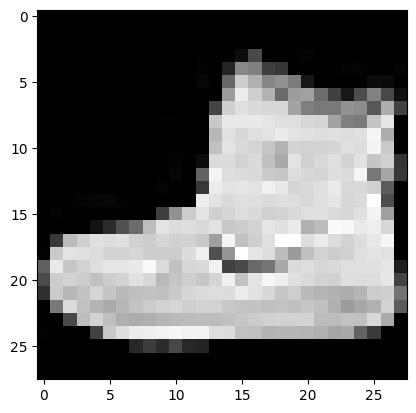

In [46]:
plt.imshow(image.squeeze(), cmap="gray")

In [47]:
image.shape

torch.Size([1, 28, 28])

In [48]:
rand_image_tensor = torch.randn(size=(1,1,28,28)).to(device)

In [49]:
# Pass image through model
model_2(rand_image_tensor)

tensor([[ 0.0366, -0.0940,  0.0686, -0.0485,  0.0068,  0.0290,  0.0132,  0.0084,
         -0.0030, -0.0185]], grad_fn=<AddmmBackward0>)

## 7.1 Stepping through `nn.Conv2d()`

In [50]:
torch.manual_seed(42)

# Create a batch of images
images = torch.randn(size=(32, 3, 64, 64))
test_image = images[0]

print(f"Image batch shape: {images.shape}")
print(f"Single image shape: {test_image.shape}")
print(f"Test image:\n {test_image}")

Image batch shape: torch.Size([32, 3, 64, 64])
Single image shape: torch.Size([3, 64, 64])
Test image:
 tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-0

In [51]:
torch.manual_seed(42)
# Create a single conv2d layer
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=3,
                       stride=1,
                       padding=0)

# Pass the data through the conv layer
conv_output = conv_layer(test_image)
conv_output.shape

torch.Size([10, 62, 62])

## 7.2 Stepping through `nn.MaxPool2d()`

In [52]:
# Print out original image shape
print(f"Test image OG shape: {test_image.shape}")

# Create a sample nn.MaxPool2d layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# Pass data through the just the conv_layer
test_image_through_conv = conv_layer(test_image)
print(f"Shape after going through conv layer: {test_image_through_conv.shape}")

# Pass data throigh max pool layer
test_image_through_conv_and_max_pool = max_pool_layer(test_image_through_conv)
print(f"Shape after going through conv and max pool layer: {test_image_through_conv_and_max_pool.shape}")

Test image OG shape: torch.Size([3, 64, 64])
Shape after going through conv layer: torch.Size([10, 62, 62])
Shape after going through conv and max pool layer: torch.Size([10, 31, 31])


In [53]:
torch.manual_seed(42)
# Create a random tensor with a similir number of dimensions to out images
random_tensor = torch.randn(size=(1, 1, 2, 2))
print(f"\nRandom tensor:\n {random_tensor}")
print(f"Random tensor shape: {random_tensor.shape}")

# Create a max pool layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# Pass the radnom tensor through the max ppool layer
max_pool_tensor = max_pool_layer(random_tensor)
print(f"\nMax pool tensor:\n {max_pool_tensor}")
print(f"Max pool tensor shape: {max_pool_tensor.shape}")



Random tensor:
 tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])
Random tensor shape: torch.Size([1, 1, 2, 2])

Max pool tensor:
 tensor([[[[0.3367]]]])
Max pool tensor shape: torch.Size([1, 1, 1, 1])


### 7.3 Setup loss function and optimizer

In [54]:
# Setup loss function /eval metrics/optimizer
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_2.parameters(),
                            lr=0.1)

In [55]:
image, label = next(iter(train_dataloader))
image.shape

torch.Size([32, 1, 28, 28])

In [56]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 3

start = timer()

for epoch in tqdm(range(epochs)):
  print(f"Epoch {epoch}\n_________________________")

  train_step(model_2,
             train_dataloader,
             loss_fn,
             optimizer,
             accuracy_fn,
             device)

  test_step(model_2,
            test_dataloader,
            loss_fn,
            accuracy_fn,
            device)

end = timer()
total_train_time_model_2 = end-start

print(f"\nRuntime: {total_train_time_model_2}")

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch 0
_________________________
Train loss:  0.59518, Train Acc:  78.38%
Test loss: 0.39500 | Test accuracy: 85.99%

Epoch 1
_________________________
Train loss:  0.36536, Train Acc:  86.90%
Test loss: 0.35244 | Test accuracy: 86.91%

Epoch 2
_________________________
Train loss:  0.32588, Train Acc:  88.13%
Test loss: 0.32719 | Test accuracy: 88.07%


Runtime: 203.43245204700008


In [57]:
# Get the model_2 results
model_2_results = eval_model(model_2,
                             test_dataloader,
                             loss_fn,
                             accuracy_fn,
                             device)

model_2_results

{'model_name': 'FashionMNISTV2',
 'model_loss': 0.32718968391418457,
 'model_acc': 88.06908945686901}

In [58]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

## Comapre model results and training time

In [59]:
import pandas as pd

compare_results = pd.DataFrame([model_0_results,
                                model_1_results,
                                model_2_results])


In [60]:
# Add training time to resulst comparison
compare_results["training_time"] = [total_train_time_model_0,
                                    total_train_time_model_1,
                                    total_train_time_model_2]

compare_results

,model_name,model_loss,model_acc,training_time
0,FashionMNISTModelV0,0.476639,83.426518,41.421099
1,FashionMNISTModelV1,0.689912,75.119808,40.073807
2,FashionMNISTV2,0.327190,88.069089,203.432452


Text(0, 0.5, 'model')

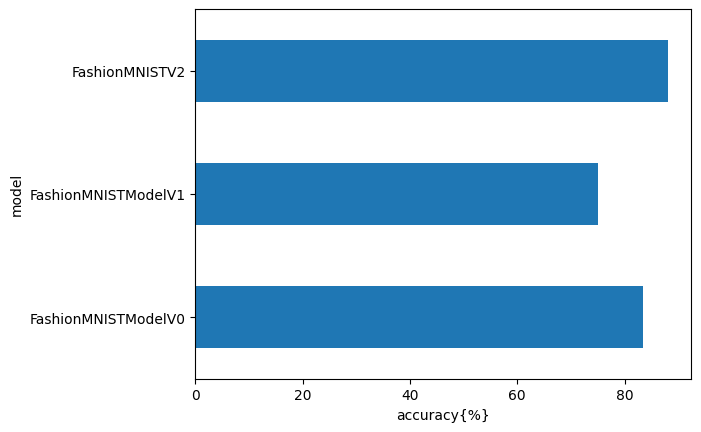

In [61]:
# Visualize or model results
compare_results.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("accuracy{%}")
plt.ylabel("model")

### 9. Make and evaliate random rpedictions with best model

In [62]:
def make_predictions(model: torch.nn.Module,
                     data: list,
                     device: torch.device = device):

  pred_probs = []
  model.eval()
  model.to(device)

  with torch.inference_mode():
    for sample in data:
      # Prepare the sample (add a batch dimension and pass to target device)
      sample = torch.unsqueeze(sample, dim = 0).to(device)

      # Forward pass (model putputs raw logits)
      pred_logit = model(sample)

      # Get prediction probability
      pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)

      # Get pred_prob off the GPU for further calculations
      pred_probs.append(pred_prob.cpu())


  # Stack the pred_probs to trun list into a tensor
  return torch.stack(pred_probs)

In [63]:
import random
#random.seed(42)

test_samples = []
test_labels = []

for sample, label in random.sample(list(test_data), k=9):
  test_samples.append(sample)
  test_labels.append(label)

# View the first sample shape
test_samples[0].shape

torch.Size([1, 28, 28])

In [64]:
# Make predictions
pred_probs = make_predictions(model_2,
                              test_samples,
                              device)

# View the first two prediction probabilites
pred_probs[:2]

tensor([[7.9690e-02, 1.1361e-03, 9.8521e-04, 9.1254e-01, 3.9497e-04, 1.3397e-05,
         4.2367e-03, 4.4533e-05, 9.5483e-04, 1.9827e-06],
        [5.9728e-06, 5.9977e-07, 5.2574e-06, 7.3357e-05, 6.4239e-07, 9.9887e-01,
         6.6763e-06, 5.1177e-05, 9.6957e-04, 1.3942e-05]])

In [65]:
# convert prediction probabilies to labels
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([3, 5, 0, 7, 1, 4, 6, 9, 2])

In [66]:
test_labels

[3, 5, 0, 7, 1, 4, 4, 9, 2]

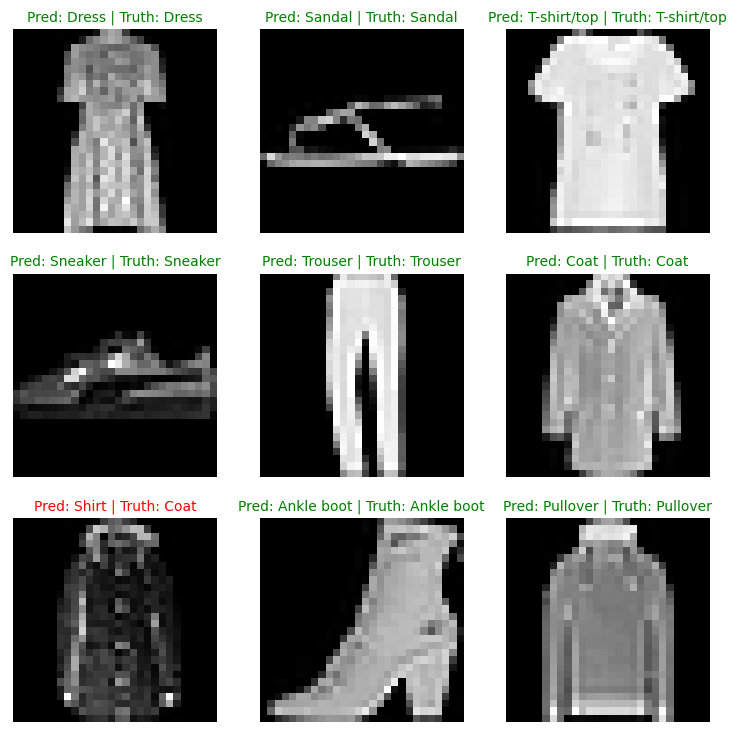

In [67]:
# Plot predictions
plt.figure(figsize=(9,9))
nrows = 3
ncols = 3

for i, sample in enumerate(test_samples):
  # Create a subplot
  plt.subplot(nrows, ncols, i+1)

  # Plot the target image
  plt.imshow(sample.squeeze(), cmap="gray")
  plt.axis(False)
  # Find the prediction (in text form)
  pred_label = class_names[pred_classes[i]]

  # Get the truth label (in text from)
  truth_label = class_names[test_labels[i]]

  # Create a title for the plot
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"

  # Check for eequality between pred and truth and change color of title text
  if pred_label == truth_label:
    plt.title(title_text, fontsize=10, c="g")
  else:
    plt.title(title_text, fontsize=10, c="r")


## 10. Making a confusion matrix for further prediction evaluation

In [68]:
!pip -q install torchmetrics

In [69]:
!pip install mlxtend

In [70]:
# 1. Make predictions with trained model
y_preds = []
model_2.eval()

with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc="Making predictions..."):
    # Send the data and targets to tattrget device
    X, y = X.to(device), y.to(device)

    # Forward pass
    y_logit = model_2(X)
    #Turn predictions from logits to prediciyion probabilites to labels
    y_pred = torch.softmax(y_logit.squeeze(), dim=0).argmax(dim=1)
    # Put prediction on CPU for evalutaiton
    y_preds.append(y_pred.cpu())

# Concanate luist of predicitions into tensor
#print(y_preds)

y_pred_tensor = torch.cat(y_preds)
y_pred_tensor

Making predictions...:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([9, 2, 1,  ..., 8, 1, 8])

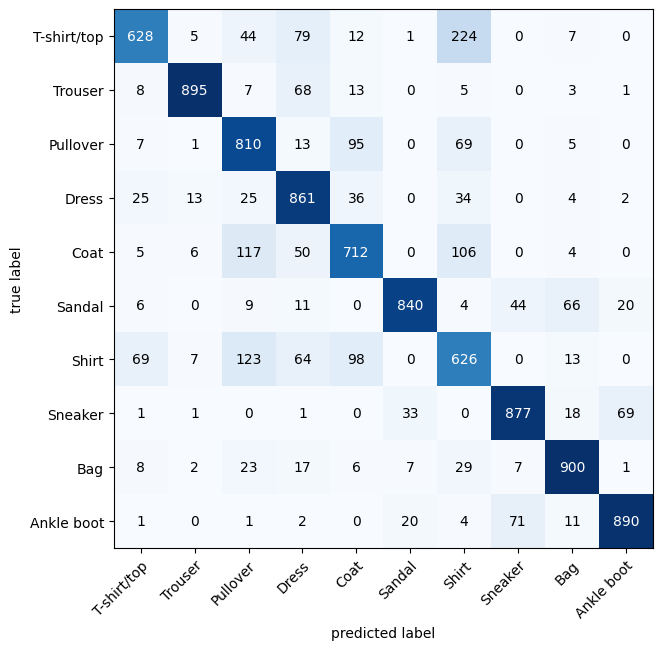

In [75]:
from mlxtend.plotting import plot_confusion_matrix
import torchmetrics
from torchmetrics import ConfusionMatrix

# 2. Setup confusion instance and comapre predictions to targets
confmat = ConfusionMatrix(task="multiclass",num_classes=len(class_names))
confmat_tensor = confmat(y_pred_tensor, test_data.targets)

# 3. Plot confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat = confmat_tensor.numpy(),
    class_names=class_names,
    figsize=(10,7)
)

In [81]:
## 11. Save and load best performing model
from pathlib import Path

SAVE_PATH = Path("models")
SAVE_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "FashionMNISTModelV2.pth"
MODEL_SAVE_PATH = SAVE_PATH / MODEL_NAME

torch.save(obj=model_2.state_dict(), f=MODEL_SAVE_PATH)

In [83]:
loaded_model_2 = FashionMNISTV2(input_shape=1,
                                hidden_units=10,
                                output_shape=len(class_names))

loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

loaded_model_2.to(device)

FashionMNISTV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier_layer): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [84]:
# Evaluate loaded model

torch.manual_seed(42)
loaded_model_2_results = eval_model(loaded_model_2,
                                    test_dataloader,
                                    loss_fn,
                                    accuracy_fn,
                                    device)
loaded_model_2_results

{'model_name': 'FashionMNISTV2',
 'model_loss': 0.32718968391418457,
 'model_acc': 88.06908945686901}

In [85]:
model_2_results

{'model_name': 'FashionMNISTV2',
 'model_loss': 0.32718968391418457,
 'model_acc': 88.06908945686901}

In [1]:
!jupyter nbconvert --ClearOutputPreprocessor.enabled=True --inplace your_notebook.ipynb

[NbConvertApp] WARNING | pattern 'your_notebook.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute
 